In [14]:
import random
import sys
import os
sys.path.append(os.getcwd())
from visualizer.main import Visualizer 
from algorithms.quadtree import QuadTree, Rectangle, Point
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection # <--- To jest klucz do szybkości
import random

In [15]:
def visualize_quadtree(qt, points_all, found_points=None, search_area=None):
    """
    Rysuje całe drzewo, punkty i ewentualnie wynik wyszukiwania w ułamku sekundy.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 1. ZBIERANIE PROSTOKĄTÓW (SIATKI)
    # Zamiast rysować od razu, zbieramy współrzędne do listy
    rects = []
    
    def collect_rects(node):
        # Konwersja ze środka (x,y,w,h) na róg (x,y) i szerokość
        r_x = node.boundary.x - node.boundary.w
        r_y = node.boundary.y - node.boundary.h
        width = node.boundary.w * 2
        height = node.boundary.h * 2
        
        rect = patches.Rectangle((r_x, r_y), width, height)
        rects.append(rect)
        
        if node.divided:
            collect_rects(node.northeast)
            collect_rects(node.northwest)
            collect_rects(node.southeast)
            collect_rects(node.southwest)

    collect_rects(qt)
    
    # Rysujemy wszystkie prostokąty na raz (dużo szybciej!)
    pc = PatchCollection(rects, facecolor='none', edgecolor='lightgray', linewidth=1)
    ax.add_collection(pc)

    # 2. RYSOWANIE WSZYSTKICH PUNKTÓW
    # Rozdzielamy X i Y do osobnych list
    all_x = [p.x for p in points_all]
    all_y = [p.y for p in points_all]
    
    # 's' to rozmiar kropki. ax.scatter jest znacznie szybsze niż plot
    ax.scatter(all_x, all_y, c='blue', s=2, label='Wszystkie punkty')

    # 3. (OPCJONALNIE) RYSOWANIE WYNIKU WYSZUKIWANIA
    if search_area and found_points:
        # Rysujemy czerwony prostokąt zapytania
        sx = search_area.x - search_area.w
        sy = search_area.y - search_area.h
        sw = search_area.w * 2
        sh = search_area.h * 2
        search_rect = patches.Rectangle((sx, sy), sw, sh, linewidth=2, edgecolor='red', facecolor='none', label='Obszar szukania')
        ax.add_patch(search_rect)
        
        # Podświetlamy znalezione punkty na zielono
        found_x = [p.x for p in found_points]
        found_y = [p.y for p in found_points]
        ax.scatter(found_x, found_y, c='lime', s=15, zorder=5, label='Znalezione')
        
        ax.legend(loc='upper right')

    # Ustawienia wykresu
    ax.set_xlim(0, 800)
    ax.set_ylim(800, 0) # Odwrócony Y
    ax.set_aspect('equal')
    plt.title(f"Quadtree: {len(points_all)} punktów")
    plt.show()

Generowanie punktów i budowa drzewa...
Znaleziono 14 punktów.
Wyświetlanie...


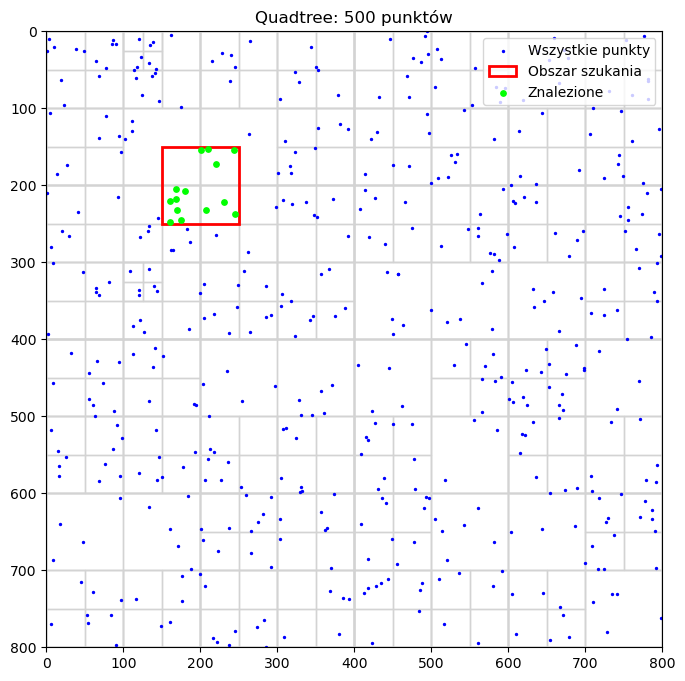

In [16]:
# --- KONFIGURACJA ---
boundary = Rectangle(400, 400, 400, 400)
qt = QuadTree(boundary, 4)
all_points = [] # Trzymamy listę wszystkich punktów dla wygody rysowania

# 1. SZYBKIE GENEROWANIE DANYCH (BEZ RYSOWANIA)
print("Generowanie punktów i budowa drzewa...")
for _ in range(500): # Możesz dać nawet 5000, będzie szybko
    p = Point(random.uniform(0, 800), random.uniform(0, 800))
    qt.insert(p)
    all_points.append(p)

# 2. PRZYKŁAD ZAPYTANIA (To co jest w zadaniu)
# Definiujemy obszar: środek (200,200), wymiary 100x100
search_range = Rectangle(200, 200, 50, 50) 
found = []
qt.query(search_range, found)
print(f"Znaleziono {len(found)} punktów.")

# 3. RYSOWANIE (RAZ, NA KOŃCU)
print("Wyświetlanie...")
visualize_quadtree(qt, all_points, found_points=found, search_area=search_range)

In [ ]:
# Zapisujemy animację do pliku 'quadtree.gif'
# interval=50 oznacza czas w milisekundach między klatkami (im mniej, tym szybciej)
# Domyślnie jest 256ms, co przy 150 punktach trwałoby wieki.
vis.show_gif(interval=50)

#print("GIF został zapisany w folderze projektu!")